In [1]:
import json
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# access data stored from twitter api which is stored in csv
tweet_data=[]
tweet_path='./twitter-data.csv'


# As data is stored in json we have to take each line and store it as a list 
tweet_file=open(tweet_path,"r")
for line in tweet_file:
    try:
        tweet=json.loads(line)
        tweet_data.append(tweet)
    except:
        continue

In [3]:
print (len(tweet_data))

28982


In [4]:
#tweet_data[0]

In [5]:
# store data of a list in a dataframe
tweets=pd.DataFrame()

In [6]:
# extract  text ,lang,location data and store it in dataframe
tweets['text']=list(map(lambda tweet: tweet['text'],tweet_data))
tweets['lang']=list(map(lambda tweet: tweet['lang'],tweet_data))
tweets['location']=list(map(lambda tweet: tweet['user']['location'] if tweet['user']['location']!=None else None,tweet_data))

In [7]:
tweets.head()

,text,lang,location
0,RT @NEC_COEAPS: Connecting over Lunch at #Hort...,en,None
1,Associate Professor in Business Data Analytics...,en,None
2,RT @resovilles: 📢Ça y est la publication #deve...,fr,"Nantes, France"
3,Attended Capital Analytics Invest: Philadelphi...,en,Philadelphia
4,RT @NEC_COEAPS: All set to start the #Hortonwo...,en,None


In [8]:
# store count of different languages
tweets_by_lang=tweets['lang'].value_counts()

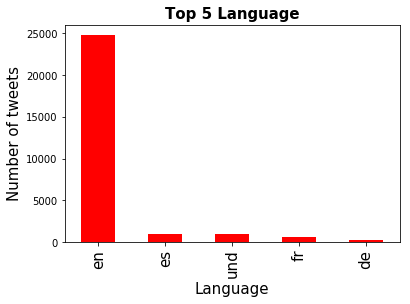

In [9]:
fig, ax=plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Language', fontsize=15)
ax.set_ylabel('Number of tweets',fontsize=15)
ax.set_title('Top 5 Language',fontsize=15,fontweight='bold')
tweets_by_lang[:5].plot(ax=ax,kind='bar',color='red')

In [10]:
# store count of each location
tweet_loca=tweets['location'].value_counts()

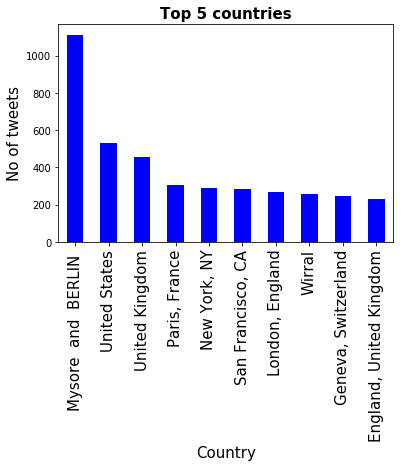

In [11]:
fig, ax1=plt.subplots()
ax1.tick_params(axis='x',labelsize=15)
ax1.tick_params(axis='y',labelsize=10)
ax1.set_xlabel('Country',fontsize=15)
ax1.set_ylabel('No of tweets',fontsize=15)
ax1.set_title('Top 5 countries',fontsize=15,fontweight='bold')
tweet_loca[:10].plot(ax=ax1,kind='bar',color='blue')


In [12]:
# finding the count of top treanding topics in Technology
import re

In [13]:
def word_found(word,text):
    word=word.lower()
    text=text.lower()
    match=re.search(word,text)
    if match:
        return True
    else:
        return False

In [14]:
tweets['bigdata']=tweets['text'].apply(lambda tweet:word_found('bigdata',tweet))
tweets['machineleaning']=tweets['text'].apply(lambda tweet:word_found('machinelearning',tweet))
tweets['devops']=tweets['text'].apply(lambda tweet:word_found('devops',tweet))
tweets['analytics']=tweets['text'].apply(lambda tweet:word_found('analytics',tweet))
tweets['softwaredeveloper']=tweets['text'].apply(lambda tweet:word_found('softwaredevloper',tweet))

In [15]:
tweet_bigdata=tweets['bigdata'].value_counts()[True]
tweet_machinelearning=tweets['machineleaning'].value_counts()[True]
tweet_devops=tweets['devops'].value_counts()[True]
tweet_analytics=tweets['analytics'].value_counts()[True]
tweet_software=tweets['softwaredeveloper'].value_counts()

In [16]:
len(tweets)

28982

In [17]:
tweet_software

False    28982
Name: softwaredeveloper, dtype: int64

In [18]:
top_market=['Bigdata','machinelearning','devops','analytics']

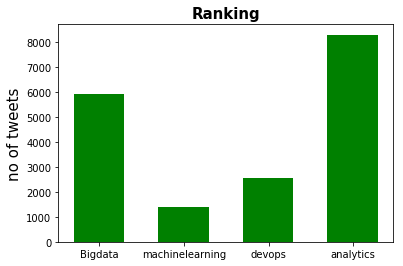

In [19]:
tweet_market=[tweet_bigdata,tweet_machinelearning,tweet_devops,tweet_analytics]
x_pos=list(range(len(top_market)))
width=0.6
fig, ax=plt.subplots()
plt.bar(x_pos,tweet_market,width,alpha=1,color='g')
ax.set_ylabel("no of tweets",fontsize=15)
ax.set_title("Ranking",fontsize=15,fontweight='bold')

ax.set_xticks([p + 0.01 * width for p in x_pos])
ax.set_xticklabels(top_market)
#@ax.set_xlabel(top_market)
plt.show()